# LCS Demo 3

**LCS Workshop- Educational LCS - eLCS**

Outcome: *Learn the concept and use of Learning Classifier Systems *(*LCSs*)

Instructors: [Dr Ryan Urbanowicz](http://www.ryanurbanowicz.com/), [Dr Will Browne](http://ecs.victoria.ac.nz/Main/WillBrowne) And [Dr Karthik Kuber](http://kkuber.mysite.syr.edu/),

The following topics will be covered in a series of hands-on exercises and demonstrations:
1. LCS in a Nutshell 
2. LCS Concepts 
3. LCS Functional Cycle 
4. LCS Adaptability 
5. LCS Applications (toy and real problems) 

<p style="color:red;">Welcome to the Educational Learning Classifier System (eLCS).</p> 
It has the core elements of the functionality that help define the concept of LCSs. It’s the same family as the fully featured ExSTraCS system, so it is easy to transfer to a state-of-the-art LCS from this shallow learning curve.

eLCS complements the forthcoming *Textbook on Learning Classifier Systems*. Each demo is paired with one of the chapters in the textbook. Therefore, there are 5 different versions of an educational learning classiﬁer system (eLCS), as relevant functionality (code) is added to eLCS at each stage. This builds up the eLCS algorithm in its entirety from Demo 1 through to 5. Demo 6 showcases how ExSTraCS may be applied to a real-world data mining example, i.e. large scale bioinformatics. 

- Demo 1 Understanding of what an LCS is attempting – how does it classify the training data?
- Demo 2 Matching and Covering
- **Demo 3 Prediction, Rule Population Evaluations, GA Rule Discovery and Parental Selection**
- Demo 4 Deletion and Niche GA + Subsumption
- Demo 5 Complete eLCS applied to a complex (toy) problem
- Bonus Demo 6 ExSTraCS applied to a real-world data mining example 

All code is in Python. This newest version is coded in Python 3.4. Here it is to be run in the Jupyter platform (http://jupyter.org/), as it supports interactive data science.

Each demo version only includes the minimum code needed to perform the functions they were designed for. This way users can start by examining the simplest version of the code and progress onwards. The demo exercises are to implement several functions in eLCS and view results in spreadsheet, text ﬁle or Python based graphics (preferable).

## Set-up and introduction to Jupyter

Please see http://jupyter.org/ on how to set-up Jupyter with Python 3.
Please download eLCS_1.ipynb, … , eLCS_5.ipynb from Github 
Please see earlier demos for hide_code and initial introductions


 - Name:        eLCS_Run.py
 - Authors:     Ryan Urbanowicz - Written at Dartmouth College, Hanover, NH, USA
 - Contact:     ryan.j.urbanowicz@darmouth.edu
 - Created:     November 1, 2013
 - Description: To run e-LCS, run this module.  A properly formatted configuration file, including all run parameters must be included with the path to that file given below.  In this example, the configuration file has been included locally, so only the file name is required.
             
--------------------------------------------------------------------------------------------------------------------------------
eLCS: Educational Learning Classifier System - A basic LCS coded for educational purposes.  This LCS algorithm uses supervised learning, and thus is most 
similar to "UCS", an LCS algorithm published by Ester Bernado-Mansilla and Josep Garrell-Guiu (2003) which in turn is based heavily on "XCS", an LCS 
algorithm published by Stewart Wilson (1995).  

Copyright (C) 2013 Ryan Urbanowicz 
This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the 
Free Software Foundation; either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABLILITY 
or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, 
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA


<p class=MsoNormal>3.1. <span style='color:red'>Demo 3.1 </span>(<b
style='mso-bidi-font-weight:normal'>Code Demo: Prediction and Rule Population
Evaluations</b>) In this implementation, we have added the <span
style='font-family:"Courier New"'>prediction array</span>, which allows
tracking <span style='font-family:"Courier New"'>accuracy</span> of the rule
population as an estimate of prediction accuracy, over the last <i
style='mso-bidi-font-style:normal'>n </i>iterations where <i style='mso-bidi-font-style:
normal'>n</i> is the tracking frequency (set to the dataset size by default).
Rule <span style='font-family:"Courier New"'>numerosity</span> is also added to
the algorithm at this point, since <span style='font-family:"Courier New"'>numerosity</span>
plays a role in prediction. However since the only discovery mechanism in the
system so far is covering, if we load an existing rule population, instead of
running the algorithm from scratch, only a classi&#64257;er numerosity of 1 is
possible. This version is encoded to print statements showing the current
instance in the dataset, all rules in the current <span style='font-family:
"Courier New"'>matchset </span>(including their respective <span class=SpellE>&#64257;tnesses</span>)
and then the prediction vote for each class, along with the selected
prediction. Readers can compare this prediction to the true phenotype of the
current instance.<o:p></o:p></p>

<p class=MsoNormal>3.2. <span style='color:red'>Demo 3.2 </span>(Code Demo: <b
style='mso-bidi-font-weight:normal'>GA Rule Discovery and Parental Selection</b>)
This implementation introduces a panmictic GA for <b style='mso-bidi-font-weight:
normal'>rule discovery</b> including <b style='mso-bidi-font-weight:normal'>parental
selection</b> (<span style='font-family:"Courier New"'>tournament</span> or <span
style='font-family:"Courier New"'>roulette wheel selection </span>are options),
<b style='mso-bidi-font-weight:normal'>mutation,</b> and <b style='mso-bidi-font-weight:
normal'>uniform crossover</b>. Also we introduce code for two key output
&#64257;les (a print out of the saved <span style='font-family:"Courier New"'>rule
population</span>, as well as a &#64257;le with <span style='font-family:"Courier New"'>population
summary statistics</span>). They are included in this and the following
implementations, as it is the &#64257;rst time that eLCS can learn anything
interesting enough to be saved and explored. This is also the &#64257;rst time
that code for complete rule population evaluations is included. Complete
evaluations are included at learning checkpoints, speci&#64257;ed in the
parameter <span class=SpellE><span style='font-family:"Courier New"'>learningIterations</span></span>
in the con&#64257;guration &#64257;le. Note that there is no deletion mechanism
yet, so the population size blows up pretty quickly, but the algorithm still
works, able to obtain perfect prediction accuracy within 10,000 iterations.<o:p></o:p></p>


In [1]:
# Import useful prewritten code from Python libraries
import random
import copy
import math

Configure the parameters, usually from a txt file:

In [2]:
###### Configuration File (eLCS)
#     In the pure Python eLCS the list  'parameters[parameter] = value #Store parameters in a dictionary' is used 
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Major Run Parameters - Essential to be set correctly for a successful run of the algorithm
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
trainFile="6Multiplexer_Data_Complete.txt"		# Path/FileName of training dataset
testFile='None'									# Path/FileName of testing dataset.  If no testing data available or desired, put 'None'.  
outFileName="ExampleRun"						# Path/NewName for new algorithm output files. Note: Do not give a file extension, this is done automatically.
learningIterations='1000.4000'		#changed from 64 # Specify complete algorithm evaluation checkpoints and maximum number of learning iterations (e.g. 1000.2000.5000 = A maximum of 5000 learning iterations with evaluations at 1000, 2000, and 5000 iterations)
N=1000											# Maximum size of the rule population (a.k.a. Micro-classifier population size, where N is the sum of the classifier numerosities in the population)
p_spec=0.5										# The probability of specifying an attribute when covering. (1-p_spec = the probability of adding '#' in ternary rule representations). Greater numbers of attributes in a dataset will require lower values of p_spec.

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Logistical Run Parameters
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
randomSeed=True #False								# Set a constant random seed value to some integer (in order to obtain reproducible results). Put 'False' if none (for pseudo-random algorithm runs).
labelInstanceID="InstanceID"					# Label for the data column header containing instance ID's.  If included label not found, algorithm assumes that no instance ID's were included.
labelPhenotype="Class"							# Label for the data column header containing the phenotype label. (Typically 'Class' for case/control datasets)
labelMissingData="NA"							# Label used for any missing data in the data set.
discreteAttributeLimit=10						# The maximum number of attribute states allowed before an attribute or phenotype is considered to be continuous (Set this value >= the number of states for any discrete attribute or phenotype in their dataset).
trackingFrequency=100								# Specifies the number of iterations before each estimated learning progress report by the algorithm ('0' = report progress every epoch, i.e. every pass through all instances in the training data).

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Supervised Learning Parameters - Generally just use default values.
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
nu=5											# (v) Power parameter used to determine the importance of high accuracy when calculating fitness. (typically set to 5, recommended setting of 1 in noisy data)
init_fit=0.01									# The initial fitness for a new classifier. (typically very small, approaching but not equal to zero)
    #New for this demo as parameters to control the GA
chi=0.8											# (X) The probability of applying crossover in the GA. (typically set to 0.5-1.0)
upsilon=0.04									# (u) The probability of mutating an allele within an offspring.(typically set to 0.01-0.05)
theta_GA=25										# The GA threshold; The GA is applied in a set when the average time since the last GA in the set is greater than theta_GA.
fitnessReduction=0.1							# Initial fitness reduction in GA offspring rules.

######------New section for GA parent selection---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Algorithm Heuristic Options
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
selectionMethod='roulette'#'tournament'			# Select GA parent selection strategy ('tournament' or 'roulette')
theta_sel=0.5									# The fraction of the correct set to be included in tournament selection.

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### PopulationReboot - An option to begin e-LCS learning from an existing, saved rule population. Note that the training data is re-shuffled during a reboot.
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
doPopulationReboot=0							# Start eLCS from an existing rule population? (1 is True, 0 is False).
popRebootPath="ExampleRun_eLCS_50000"		

Offline environment: class to cycle through an offline dataset

In [3]:
class Offline_Environment:
    def __init__(self):
        #Initialize global variables-------------------------------------------------
        self.dataRef = 0
        self.storeDataRef = 0
        self.formatData = DataManagement(cons.trainFile, cons.testFile)
        
        #Initialize the first dataset instance to be passed to eLCS
        self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
        self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
        if cons.testFile == 'None':
            pass
        else:
            self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
            self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]
        

    def getTrainInstance(self):
        """ Returns the current training instance. """ 
        return [self.currentTrainState, self.currentTrainPhenotype]
        
        
    def getTestInstance(self):
        """ Returns the current training instance. """
        return [self.currentTestState, self.currentTestPhenotype]
    
    
    def newInstance(self, isTraining): 
        """  Shifts the environment to the next instance in the data. """
        #-------------------------------------------------------
        # Training Data
        #-------------------------------------------------------
        if isTraining: 
            if self.dataRef < (self.formatData.numTrainInstances-1):
                self.dataRef += 1
                self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
                self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
            else:  #Once learning has completed an epoch (i.e. a cycle of iterations though the entire training dataset) it starts back at the first instance in the data)
                self.resetDataRef(isTraining)
                
        #-------------------------------------------------------
        # Testing Data
        #-------------------------------------------------------
        else:
            if self.dataRef < (self.formatData.numTestInstances-1):
                self.dataRef += 1
                self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
                self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]
      
      
    def resetDataRef(self, isTraining):
        """ Resets the environment back to the first instance in the current data set. """
        self.dataRef = 0 
        if isTraining:
            self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
            self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
        else:
            self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
            self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]


    def startEvaluationMode(self):
        """ Turns on evaluation mode.  Saves the instance we left off in the training data. """
        self.storeDataRef = self.dataRef
        
        
    def stopEvaluationMode(self):
        """ Turns off evaluation mode.  Re-establishes place in dataset."""
        self.dataRef = self.storeDataRef

Create the constants that control the evolutionary process [i.e. the 'cons' object from Constants class]

In [4]:
class Constants:
    def setConstants(self):
        """ Takes the parameters parsed as a dictionary from eLCS_ConfigParser and saves them as global constants. """
        
        # Major Run Parameters -----------------------------------------------------------------------------------------
        self.trainFile = trainFile # par['trainFile']                                       #Saved as text
        self.testFile = testFile #par['testFile']                                         #Saved as text
        self.originalOutFileName = outFileName #str(par['outFileName'])                      #Saved as text
        self.outFileName = outFileName +'_eLCS'  #str(par['outFileName'])+'_eLCS'                  #Saved as text
        self.learningIterations = learningIterations #par['learningIterations']                     #Saved as text
        self.N = N #int(par['N'])                                                  #Saved as integer
        self.p_spec = p_spec # float(par['p_spec'])                                      #Saved as float
        
        # Logistical Run Parameters ------------------------------------------------------------------------------------
        # if par['randomSeed'] == 'False' or par['randomSeed'] == 'false':
        if randomSeed == False:
            self.useSeed = False                                                #Saved as Boolean
        else:
            self.useSeed = True                                                 #Saved as Boolean
            self.randomSeed = randomSeed #int(par['randomSeed'])                #Saved as integer
            
        self.labelInstanceID = labelInstanceID  #par['labelInstanceID']                           #Saved as text
        self.labelPhenotype = labelPhenotype # par['labelPhenotype']                             #Saved as text
        self.labelMissingData = labelMissingData  #par['labelMissingData']                         #Saved as text
        self.discreteAttributeLimit = discreteAttributeLimit # int(par['discreteAttributeLimit'])        #Saved as integer
        self.trackingFrequency = trackingFrequency  #int(par['trackingFrequency'])                  #Saved as integer
        
        # Supervised Learning Parameters -------------------------------------------------------------------------------
        self.nu = nu #int(par['nu'])                                                #Saved as integer
        self.init_fit = init_fit #float(par['init_fit'])                                  #Saved as float
        #new
        self.chi = chi #float(par['chi'])                                            #Saved as float
        self.upsilon = upsilon #float(par['upsilon'])                                    #Saved as float
        self.theta_GA = theta_GA #int(par['theta_GA'])                                    #Saved as integer
        self.fitnessReduction = fitnessReduction #float(par['fitnessReduction'])                  #Saved as float
        
        # Algorithm Heuristic Options -------------------------------------------------------------------------------
        self.selectionMethod = selectionMethod #par['selectionMethod']                           #Saved as text
        self.theta_sel = theta_sel #float(par['theta_sel'])                                #Saved as float
        
        # PopulationReboot -------------------------------------------------------------------------------
        self.doPopulationReboot = doPopulationReboot # bool(int(par['doPopulationReboot']))          #Saved as Boolean
        self.popRebootPath = popRebootPath #par['popRebootPath']                               #Saved as text
        
        
    def referenceEnv(self, e):
        """ Store reference to environment object. """
        self.env = e
 
        
    def parseIterations(self):
        """ Parse the 'learningIterations' string to identify the maximum number of learning iterations as well as evaluation checkpoints. """
        checkpoints = self.learningIterations.split('.') 
        for i in range(len(checkpoints)): 
            checkpoints[i] = int(checkpoints[i])
            
        self.learningCheckpoints = checkpoints
        self.maxLearningIterations = self.learningCheckpoints[(len(self.learningCheckpoints)-1)] 
        
        if self.trackingFrequency == 0:#throws an odd error???
            self.trackingFrequency = self.env.formatData.numTrainInstances  #Adjust tracking frequency to match the training data size - learning tracking occurs once every epoch
      

In [5]:

#To access one of the above constant values from another module, import GHCS_Constants * and use "cons.something"
cons = Constants() 
cons.setConstants() #Store run parameters in the 'Constants' module.
cons.parseIterations() #Store run parameters in the 'Constants' module.
#print(cons.maxLearningIterations)

Data management, e.g. load data from a file

In [6]:
class DataManagement:
    def __init__(self, trainFile, testFile, infoList = None):
        #Set random seed if specified.-----------------------------------------------
        if cons.useSeed:
            random.seed(cons.randomSeed)
        else:
            random.seed(None)

        #Initialize global variables-------------------------------------------------
        self.numAttributes = None       # The number of attributes in the input file. 
        self.areInstanceIDs = False     # Does the dataset contain a column of Instance IDs? (If so, it will not be included as an attribute)
        self.instanceIDRef = None       # The column reference for Instance IDs
        self.phenotypeRef = None        # The column reference for the Class/Phenotype column
        self.discretePhenotype = True   # Is the Class/Phenotype Discrete? (False = Continuous)
        self.attributeInfo = []         # Stores Discrete (0) or Continuous (1) for each attribute
        self.phenotypeList = []         # Stores all possible discrete phenotype states/classes or maximum and minimum values for a continuous phenotype
        self.phenotypeRange = None      # Stores the difference between the maximum and minimum values for a continuous phenotype
        
        #Train/Test Specific-----------------------------------------------------------------------------
        self.trainHeaderList = []       # The dataset column headers for the training data
        self.testHeaderList = []        # The dataset column headers for the testing data
        self.numTrainInstances = None   # The number of instances in the training data
        self.numTestInstances = None    # The number of instances in the testing data
        
        print("----------------------------------------------------------------------------")
        print("Environment: Formatting Data... ")
        
        #Detect Features of training data--------------------------------------------------------------------------
        rawTrainData = self.loadData(trainFile, True) #Load the raw data.

        self.characterizeDataset(rawTrainData)  #Detect number of attributes, instances, and reference locations.
        
        if cons.testFile == 'None': #If no testing data is available, formatting relies solely on training data.
            data4Formating = rawTrainData
        else:
            rawTestData = self.loadData(testFile, False) #Load the raw data.
            self.compareDataset(rawTestData) #Ensure that key features are the same between training and testing datasets.
            data4Formating = rawTrainData + rawTestData #Merge Training and Testing datasets

        self.discriminatePhenotype(data4Formating) #Determine if endpoint/phenotype is discrete or continuous.
        if self.discretePhenotype:
            self.discriminateClasses(data4Formating) #Detect number of unique phenotype identifiers.
        else:
            self.characterizePhenotype(data4Formating)
            
        self.discriminateAttributes(data4Formating) #Detect whether attributes are discrete or continuous.
        self.characterizeAttributes(data4Formating) #Determine potential attribute states or ranges.
        
        #Format and Shuffle Datasets----------------------------------------------------------------------------------------
        if cons.testFile != 'None':
            self.testFormatted = self.formatData(rawTestData) #Stores the formatted testing data set used throughout the algorithm.

        self.trainFormatted = self.formatData(rawTrainData) #Stores the formatted training data set used throughout the algorithm.       
        print("----------------------------------------------------------------------------")

        
    def loadData(self, dataFile, doTrain):
        """ Load the data file. """     
        print("DataManagement: Loading Data... " + str(dataFile))
        datasetList = []
        try:       
            f = open(dataFile,'r')
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', dataFile)
            raise
            
        else:
            if doTrain:
                self.trainHeaderList = f.readline().rstrip('\n').split('\t')   #strip off first row
            else:
                self.testHeaderList = f.readline().rstrip('\n').split('\t')   #strip off first row
            for line in f:
                lineList = line.strip('\n').split('\t')
                datasetList.append(lineList)
            f.close()

        return datasetList
    
    
    def characterizeDataset(self, rawTrainData):
        " Detect basic dataset parameters " 
        #Detect Instance ID's and save location if they occur.  Then save number of attributes in data.
        if cons.labelInstanceID in self.trainHeaderList:
            self.areInstanceIDs = True
            self.instanceIDRef = self.trainHeaderList.index(cons.labelInstanceID)
            print("DataManagement: Instance ID Column location = "+str(self.instanceIDRef))
            self.numAttributes = len(self.trainHeaderList)-2 #one column for InstanceID and another for the phenotype.
        else:
            self.numAttributes = len(self.trainHeaderList)-1
        
        #Identify location of phenotype column
        if cons.labelPhenotype in self.trainHeaderList:
            self.phenotypeRef = self.trainHeaderList.index(cons.labelPhenotype)
            print("DataManagement: Phenotype Column Location = "+str(self.phenotypeRef))
        else:
            print("DataManagement: Error - Phenotype column not found!  Check data set to ensure correct phenotype column label, or inclusion in the data.")

        #Adjust training header list to just include attributes labels
        if self.areInstanceIDs:
            if self.phenotypeRef > self.instanceIDRef:
                self.trainHeaderList.pop(self.phenotypeRef)
                self.trainHeaderList.pop(self.instanceIDRef)
            else:
                self.trainHeaderList.pop(self.instanceIDRef)
                self.trainHeaderList.pop(self.phenotypeRef)
        else:
            self.trainHeaderList.pop(self.phenotypeRef)
        
        #Store number of instances in training data
        self.numTrainInstances = len(rawTrainData)
        print("DataManagement: Number of Attributes = " + str(self.numAttributes)) 
        print("DataManagement: Number of Instances = " + str(self.numTrainInstances)) 


    def discriminatePhenotype(self, rawData):
        """ Determine whether the phenotype is Discrete(class-based) or Continuous """
        print("DataManagement: Analyzing Phenotype...")
        inst = 0
        classDict = {}
        while self.discretePhenotype and len(list(classDict.keys())) <= cons.discreteAttributeLimit and inst < self.numTrainInstances:  #Checks which discriminate between discrete and continuous attribute
            target = rawData[inst][self.phenotypeRef]
            if target in list(classDict.keys()):  #Check if we've seen this attribute state yet.
                classDict[target] += 1
            elif target == cons.labelMissingData: #Ignore missing data
                print("DataManagement: Warning - Individual detected with missing phenotype information!")
                pass
            else: #New state observed
                classDict[target] = 1
            inst += 1

        if len(list(classDict.keys())) > cons.discreteAttributeLimit:
            self.discretePhenotype = False
            self.phenotypeList = [float(target),float(target)]
            print("DataManagement: Phenotype Detected as Continuous.")
        else:
            print("DataManagement: Phenotype Detected as Discrete.")
            
    
    def discriminateClasses(self, rawData):
        """ Determines number of classes and their identifiers. Only used if phenotype is discrete. """
        print("DataManagement: Detecting Classes...")
        inst = 0
        classCount = {}
        while inst < self.numTrainInstances:
            target = rawData[inst][self.phenotypeRef]
            if target in self.phenotypeList:
                classCount[target] += 1 
            else:
                self.phenotypeList.append(target)
                classCount[target] = 1
            inst += 1
        print("DataManagement: Following Classes Detected:" + str(self.phenotypeList))
        for each in list(classCount.keys()):
            print("Class: "+str(each)+ " count = "+ str(classCount[each]))
            
                     
    def compareDataset(self, rawTestData):
        " Ensures that the attributes in the testing data match those in the training data.  Also stores some information about the testing data. "
        if self.areInstanceIDs:
            if self.phenotypeRef > self.instanceIDRef:
                self.testHeaderList.pop(self.phenotypeRef)
                self.testHeaderList.pop(self.instanceIDRef)
            else:
                self.testHeaderList.pop(self.instanceIDRef)
                self.testHeaderList.pop(self.phenotypeRef)
        else:
            self.testHeaderList.pop(self.phenotypeRef)
            
        if self.trainHeaderList != self.testHeaderList:
            print("DataManagement: Error - Training and Testing Dataset Headers are not equivalent")

        # Stores the number of instances in the testing data.
        self.numTestInstances = len(rawTestData)
        print("DataManagement: Number of Attributes = " + str(self.numAttributes)) 
        print("DataManagement: Number of Instances = " + str(self.numTestInstances)) 


    def discriminateAttributes(self, rawData):
        """ Determine whether attributes in dataset are discrete or continuous and saves this information. """
        print("DataManagement: Detecting Attributes...")
        self.discreteCount = 0
        self.continuousCount = 0
        for att in range(len(rawData[0])):
            if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                attIsDiscrete = True
                inst = 0
                stateDict = {}
                while attIsDiscrete and len(list(stateDict.keys())) <= cons.discreteAttributeLimit and inst < self.numTrainInstances:  #Checks which discriminate between discrete and continuous attribute
                    target = rawData[inst][att]
                    if target in list(stateDict.keys()):  #Check if we've seen this attribute state yet.
                        stateDict[target] += 1
                    elif target == cons.labelMissingData: #Ignore missing data
                        pass
                    else: #New state observed
                        stateDict[target] = 1
                    inst += 1

                if len(list(stateDict.keys())) > cons.discreteAttributeLimit:
                    attIsDiscrete = False
                if attIsDiscrete:
                    self.attributeInfo.append([0,[]])    
                    self.discreteCount += 1
                else:
                    self.attributeInfo.append([1,[float(target),float(target)]])   #[min,max]
                    self.continuousCount += 1
        print("DataManagement: Identified "+str(self.discreteCount)+" discrete and "+str(self.continuousCount)+" continuous attributes.") #Debug

            
    def characterizeAttributes(self, rawData):
        """ Determine range (if continuous) or states (if discrete) for each attribute and saves this information"""
        print("DataManagement: Characterizing Attributes...")
        attributeID = 0
        for att in range(len(rawData[0])):
            if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                for inst in range(len(rawData)):
                    target = rawData[inst][att]
                    if not self.attributeInfo[attributeID][0]: #If attribute is discrete
                        if target in self.attributeInfo[attributeID][1] or target == cons.labelMissingData:
                            pass  #NOTE: Could potentially store state frequency information to guide learning.
                        else:
                            self.attributeInfo[attributeID][1].append(target)
                    else: #If attribute is continuous
                        
                        #Find Minimum and Maximum values for the continuous attribute so we know the range.
                        if target == cons.labelMissingData:
                            pass
                        elif float(target) > self.attributeInfo[attributeID][1][1]:  #error
                            self.attributeInfo[attributeID][1][1] = float(target)
                        elif float(target) < self.attributeInfo[attributeID][1][0]:
                            self.attributeInfo[attributeID][1][0] = float(target)
                        else:
                            pass
                attributeID += 1
                

    def characterizePhenotype(self, rawData):
        """ Determine range of phenotype values. """
        print("DataManagement: Characterizing Phenotype...")
        for inst in range(len(rawData)):
            target = rawData[inst][self.phenotypeRef]
            
            #Find Minimum and Maximum values for the continuous phenotype so we know the range.
            if target == cons.labelMissingData:
                pass
            elif float(target) > self.phenotypeList[1]:  
                self.phenotypeList[1] = float(target)
            elif float(target) < self.phenotypeList[0]:
                self.phenotypeList[0] = float(target)
            else:
                pass
        self.phenotypeRange = self.phenotypeList[1] - self.phenotypeList[0]
                
            
    def formatData(self,rawData):
        """ Get the data into a format convenient for the algorithm to interact with. Specifically each instance is stored in a list as follows; [Attribute States, Phenotype, InstanceID] """
        formatted = []
        #Initialize data format---------------------------------------------------------
        for i in range(len(rawData)):  
            formatted.append([None,None,None]) #[Attribute States, Phenotype, InstanceID]

        for inst in range(len(rawData)):
            stateList = []
            attributeID = 0
            for att in range(len(rawData[0])):
                if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                    target = rawData[inst][att]
                    
                    if self.attributeInfo[attributeID][0]: #If the attribute is continuous
                        if target == cons.labelMissingData:
                            stateList.append(target) #Missing data saved as text label
                        else:
                            stateList.append(float(target)) #Save continuous data as floats. 
                    else: #If the attribute is discrete - Format the data to correspond to the GABIL (DeJong 1991)
                        stateList.append(target) #missing data, and discrete variables, all stored as string objects   
                    attributeID += 1
            
            #Final Format-----------------------------------------------
            formatted[inst][0] = stateList                           #Attribute states stored here
            if self.discretePhenotype:
                formatted[inst][1] = rawData[inst][self.phenotypeRef]        #phenotype stored here
            else:
                formatted[inst][1] = float(rawData[inst][self.phenotypeRef])
            if self.areInstanceIDs:
                formatted[inst][2] = rawData[inst][self.instanceIDRef]   #Instance ID stored here
            else:
                pass    #instance ID neither given nor required.
            #-----------------------------------------------------------
        random.shuffle(formatted) #One time randomization of the order the of the instances in the data, so that if the data was ordered by phenotype, this potential learning bias (based on instance ordering) is eliminated.  
        return formatted
    

Classifier class! Worth reading :)

In [7]:
class Classifier:
    def __init__(self,a=None,b=None,c=None,d=None):
        #Major Parameters --------------------------------------------------
        self.specifiedAttList = []      # Attribute Specified in classifier: Similar to Bacardit 2009 - ALKR + GABIL, continuous and discrete rule representation
        self.condition = []             # States of Attributes Specified in classifier: Similar to Bacardit 2009 - ALKR + GABIL, continuous and discrete rule representation
        self.phenotype = None           # Class if the endpoint is discrete, and a continuous phenotype if the endpoint is continuous
        
        self.fitness = cons.init_fit    # Classifier fitness - initialized to a constant initial fitness value
        self.accuracy = 0.0             # Classifier accuracy - Accuracy calculated using only instances in the dataset which this rule matched.
        self.numerosity = 1   #new but not fully used yet!  # The number of rule copies stored in the population.  (Indirectly stored as incremented numerosity)
     
        #Experience Management ---------------------------------------------
        self.initTimeStamp = None       # Iteration in which the rule first appeared.
        
        #Classifier Accuracy Tracking --------------------------------------
        self.matchCount = 0             # Known in many LCS implementations as experience i.e. the total number of times this classifier was in a match set
        self.correctCount = 0           # The total number of times this classifier was in a correct set
        
        if isinstance(b,list):
            self.classifierCovering(a,b,c)
        elif isinstance(a,Classifier):
            self.classifierCopy(a, b)
        elif isinstance(a,list) and b == None:
            self.rebootClassifier(a)
        else:
            print("Classifier: Error building classifier.")
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # CLASSIFIER CONSTRUCTION METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------       
    def classifierCovering(self, exploreIter, state, phenotype):
        """ Makes a new classifier when the covering mechanism is triggered.  The new classifier will match the current training instance. 
        Covering will NOT produce a default rule (i.e. a rule with a completely general condition). """
        #Initialize new classifier parameters----------
        self.timeStampGA = exploreIter #new and important for triggering the ga when appropriate
        self.initTimeStamp = exploreIter
        dataInfo = cons.env.formatData
        #-------------------------------------------------------
        # DISCRETE PHENOTYPE
        #-------------------------------------------------------
        if dataInfo.discretePhenotype: 
            self.phenotype = phenotype
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        else:
            phenotypeRange = dataInfo.phenotypeList[1] - dataInfo.phenotypeList[0]
            rangeRadius = random.randint(25,75)*0.01*phenotypeRange / 2.0 #Continuous initialization domain radius.
            Low = float(phenotype) - rangeRadius
            High = float(phenotype) + rangeRadius
            self.phenotype = [Low,High] #ALKR Representation, Initialization centered around training instance  with a range between 25 and 75% of the domain size.      
        #-------------------------------------------------------
        # GENERATE MATCHING CONDITION
        #-------------------------------------------------------
        while len(self.specifiedAttList) < 1:
            for attRef in range(len(state)):
                if random.random() < cons.p_spec and state[attRef] != cons.labelMissingData:
                    self.specifiedAttList.append(attRef)
                    self.condition.append(self.buildMatch(attRef, state))
        
    #new method tp copy a classifier prior to evolving it              
    def classifierCopy(self, clOld, exploreIter):
        """  Constructs an identical Classifier.  However, the experience of the copy is set to 0 and the numerosity 
        is set to 1 since this is indeed a new individual in a population. Used by the genetic algorithm to generate 
        offspring based on parent classifiers."""
        self.specifiedAttList = copy.deepcopy(clOld.specifiedAttList)
        self.condition = copy.deepcopy(clOld.condition) 
        self.phenotype = copy.deepcopy(clOld.phenotype)
        self.timeStampGA = exploreIter
        self.initTimeStamp = exploreIter
        self.fitness = clOld.fitness
        self.accuracy = clOld.accuracy
          
    def rebootClassifier(self, classifierList): 
        """ Rebuilds a saved classifier as part of the population Reboot """
        numAttributes = cons.env.formatData.numAttributes
        attInfo = cons.env.formatData.attributeInfo
        for attRef in range(0,numAttributes):
            if classifierList[attRef] != '#':  #Attribute in rule is not wild
                if attInfo[attRef][0]: #Continuous Attribute
                    valueRange = classifierList[attRef].split(';')
                    self.condition.append(valueRange)
                    self.specifiedAttList.append(attRef)
                else:
                    self.condition.append(classifierList[attRef])
                    self.specifiedAttList.append(attRef)
        #-------------------------------------------------------
        # DISCRETE PHENOTYPE
        #-------------------------------------------------------
        if cons.env.formatData.discretePhenotype: 
            self.phenotype = str(classifierList[numAttributes])
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        else:
            self.phenotype = classifierList[numAttributes].split(';')
            for i in range(2): 
                self.phenotype[i] = float(self.phenotype[i])

        self.fitness = float(classifierList[numAttributes+1])
        self.accuracy = float(classifierList[numAttributes+2])
        self.initTimeStamp = int(classifierList[numAttributes+6])
        self.numerosity = int(classifierList[numAttributes+3]) #new
        self.timeStampGA = int(classifierList[numAttributes+5]) #new
        
        self.correctCount = int(classifierList[numAttributes+9])
        self.matchCount = int(classifierList[numAttributes+10])


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # MATCHING
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  
    def match(self, state):
        """ Returns if the classifier matches in the current situation. """ 
        for i in range(len(self.condition)):
            attributeInfo = cons.env.formatData.attributeInfo[self.specifiedAttList[i]]
            #-------------------------------------------------------
            # CONTINUOUS ATTRIBUTE
            #-------------------------------------------------------
            if attributeInfo[0]:
                instanceValue = state[self.specifiedAttList[i]]
                if self.condition[i][0] < instanceValue < self.condition[i][1] or instanceValue == cons.labelMissingData:
                    pass
                else:
                    return False  
            #-------------------------------------------------------
            # DISCRETE ATTRIBUTE
            #-------------------------------------------------------
            else:
                stateRep = state[self.specifiedAttList[i]]  
                if stateRep == self.condition[i] or stateRep == cons.labelMissingData:
                    pass
                else:
                    return False 
        return True
        
    #--------This whole block is new as is the Rule Discovery (GA)--------------------------------------------------------------------------------------------------------------------------------------------
    # GENETIC ALGORITHM MECHANISMS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  
    def uniformCrossover(self, cl):
        """ Applies uniform crossover and returns if the classifiers changed. Handles both discrete and continuous attributes. """
        if cons.env.formatData.discretePhenotype or random.random() < 0.5: #Always crossover condition if the phenotype is discrete (if continuous phenotype, half the time phenotype crossover is performed instead)
            p_self_specifiedAttList = copy.deepcopy(self.specifiedAttList)
            p_cl_specifiedAttList = copy.deepcopy(cl.specifiedAttList)
                
            #Make list of attribute references appearing in at least one of the parents.-----------------------------
            comboAttList = []
            for i in p_self_specifiedAttList:
                comboAttList.append(i)
            for i in p_cl_specifiedAttList:
                if i not in comboAttList:
                    comboAttList.append(i)
                elif not cons.env.formatData.attributeInfo[i][0]: #Attribute specified in both parents, and the attribute is discrete (then no reason to cross over)
                    comboAttList.remove(i)
            comboAttList.sort()
            #--------------------------------------------------------------------------------------------------------
            changed = False;   
            for attRef in comboAttList:  #Each condition specifies different attributes, so we need to go through all attributes in the dataset.
                attributeInfo = cons.env.formatData.attributeInfo[attRef]
                probability = 0.5  #Equal probability for attribute alleles to be exchanged.
                #-----------------------------
                ref = 0
                #if attRef in self.specifiedAttList:
                if attRef in p_self_specifiedAttList:
                    ref += 1
                #if attRef in cl.specifiedAttList:
                if attRef in p_cl_specifiedAttList:
                    ref += 1
                #-----------------------------

                if ref == 0:    #Attribute not specified in either condition (Attribute type makes no difference)
                    print("Error: UniformCrossover!")
                    pass
                
                elif ref == 1:  #Attribute specified in only one condition - do probabilistic switch of whole attribute state (Attribute type makes no difference)
                    if attRef in p_self_specifiedAttList and random.random() > probability: 
                        i = self.specifiedAttList.index(attRef) #reference to the position of the attribute in the rule representation
                        cl.condition.append(self.condition.pop(i)) #Take attribute from self and add to cl
                        cl.specifiedAttList.append(attRef)
                        self.specifiedAttList.remove(attRef)
                        changed = True #Remove att from self and add to cl

                        
                    if attRef in p_cl_specifiedAttList and random.random() < probability: 
                        i = cl.specifiedAttList.index(attRef) #reference to the position of the attribute in the rule representation
                        self.condition.append(cl.condition.pop(i)) #Take attribute from self and add to cl
                        self.specifiedAttList.append(attRef)
                        cl.specifiedAttList.remove(attRef)
                        changed = True #Remove att from cl and add to self.

    
                else: #Attribute specified in both conditions - do random crossover between state alleles.  The same attribute may be specified at different positions within either classifier
                    #-------------------------------------------------------
                    # CONTINUOUS ATTRIBUTE
                    #-------------------------------------------------------
                    if attributeInfo[0]: 
                        i_cl1 = self.specifiedAttList.index(attRef) #pairs with self (classifier 1)
                        i_cl2 = cl.specifiedAttList.index(attRef)   #pairs with cl (classifier 2)
                        tempKey = random.randint(0,3) #Make random choice between 4 scenarios, Swap minimums, Swap maximums, Self absorbs cl, or cl absorbs self.
                        if tempKey == 0:    #Swap minimum
                            temp = self.condition[i_cl1][0]
                            self.condition[i_cl1][0] = cl.condition[i_cl2][0]
                            cl.condition[i_cl2][0] = temp
                        elif tempKey == 1:  #Swap maximum
                            temp = self.condition[i_cl1][1]
                            self.condition[i_cl1][1] = cl.condition[i_cl2][1]
                            cl.condition[i_cl2][1] = temp
                        else: #absorb range
                            allList = self.condition[i_cl1] + cl.condition[i_cl2]
                            newMin = min(allList)
                            newMax = max(allList)
                            if tempKey == 2:  #self absorbs cl
                                self.condition[i_cl1] = [newMin,newMax]
                                #Remove cl
                                cl.condition.pop(i_cl2)
                                cl.specifiedAttList.remove(attRef)
                            else: #cl absorbs self
                                cl.condition[i_cl2] = [newMin,newMax]
                                #Remove self
                                self.condition.pop(i_cl1)
                                self.specifiedAttList.remove(attRef)
                    #-------------------------------------------------------
                    # DISCRETE ATTRIBUTE
                    #-------------------------------------------------------
                    else: 
                        pass

            tempList1 = copy.deepcopy(p_self_specifiedAttList)
            tempList2 = copy.deepcopy(cl.specifiedAttList)
            tempList1.sort()
            tempList2.sort()
            
            if changed and (tempList1 == tempList2):
                changed = False
                
            return changed
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE CROSSOVER
        #-------------------------------------------------------
        else: 
            return self.phenotypeCrossover(cl)
        
        
    def phenotypeCrossover(self, cl):
        """ Crossover a continuous phenotype """
        changed = False
        if self.phenotype[0] == cl.phenotype[0] and self.phenotype[1] == cl.phenotype[1]:
            return changed
        else:
            tempKey = random.random() < 0.5 #Make random choice between 4 scenarios, Swap minimums, Swap maximums, Children preserve parent phenotypes.
            if tempKey: #Swap minimum
                temp = self.phenotype[0]
                self.phenotype[0] = cl.phenotype[0]
                cl.phenotype[0] = temp
                changed = True
            elif tempKey:  #Swap maximum
                temp = self.phenotype[1]
                self.phenotype[1] = cl.phenotype[1]
                cl.phenotype[1] = temp
                changed = True
            
        return changed
        
        
    def Mutation(self, state, phenotype):
        """ Mutates the condition of the classifier. Also handles phenotype mutation. This is a niche mutation, which means that the resulting classifier will still match the current instance.  """               
        changed = False;   
        #-------------------------------------------------------
        # MUTATE CONDITION
        #-------------------------------------------------------
        for attRef in range(cons.env.formatData.numAttributes):  #Each condition specifies different attributes, so we need to go through all attributes in the dataset.
            attributeInfo = cons.env.formatData.attributeInfo[attRef]
            if random.random() < cons.upsilon and state[attRef] != cons.labelMissingData:
                #MUTATION--------------------------------------------------------------------------------------------------------------
                if attRef not in self.specifiedAttList: #Attribute not yet specified
                    self.specifiedAttList.append(attRef)
                    self.condition.append(self.buildMatch(attRef, state)) #buildMatch handles both discrete and continuous attributes
                    changed = True
                    
                elif attRef in self.specifiedAttList: #Attribute already specified
                    i = self.specifiedAttList.index(attRef) #reference to the position of the attribute in the rule representation
                    #-------------------------------------------------------
                    # DISCRETE OR CONTINUOUS ATTRIBUTE - remove attribute specification with 50% chance if we have continuous attribute, or 100% if discrete attribute.
                    #-------------------------------------------------------
                    if not attributeInfo[0] or random.random() > 0.5: 
                        self.specifiedAttList.remove(attRef)
                        self.condition.pop(i) #buildMatch handles both discrete and continuous attributes
                        changed = True
                    #-------------------------------------------------------
                    # CONTINUOUS ATTRIBUTE - (mutate range with 50% probability vs. removing specification of this attribute all together)
                    #-------------------------------------------------------
                    else: 
                        #Mutate continuous range - based on Bacardit 2009 - Select one bound with uniform probability and add or subtract a randomly generated offset to bound, of size between 0 and 50% of att domain.
                        attRange = float(attributeInfo[1][1]) - float(attributeInfo[1][0])
                        mutateRange = random.random()*0.5*attRange
                        if random.random() > 0.5: #Mutate minimum 
                            if random.random() > 0.5: #Add
                                self.condition[i][0] += mutateRange
                            else: #Subtract
                                self.condition[i][0] -= mutateRange
                        else: #Mutate maximum
                            if random.random() > 0.5: #Add
                                self.condition[i][1] += mutateRange
                            else: #Subtract
                                self.condition[i][1] -= mutateRange
                                
                        #Repair range - such that min specified first, and max second.
                        self.condition[i].sort()
                        changed = True
                #-------------------------------------------------------
                # NO MUTATION OCCURS
                #-------------------------------------------------------
                else:
                    pass
        #-------------------------------------------------------
        # MUTATE PHENOTYPE
        #-------------------------------------------------------
        if cons.env.formatData.discretePhenotype:
            nowChanged = self.discretePhenotypeMutation()
        else:
            nowChanged = self.continuousPhenotypeMutation(phenotype)
        
        if changed or nowChanged:
            return True


    def discretePhenotypeMutation(self):
        """ Mutate this rule's discrete phenotype. """
        changed = False
        if random.random() < cons.upsilon:
            phenotypeList = copy.deepcopy(cons.env.formatData.phenotypeList)
            phenotypeList.remove(self.phenotype)
            newPhenotype = random.sample(phenotypeList,1)
            self.phenotype = newPhenotype[0]
            changed= True

        return changed
        
        
    def continuousPhenotypeMutation(self, phenotype):
        """ Mutate this rule's continuous phenotype. """
        changed = False
        if random.random() < cons.upsilon: #Mutate continuous phenotype
            phenRange = self.phenotype[1] - self.phenotype[0]
            mutateRange = random.random()*0.5*phenRange
            tempKey = random.randint(0,2) #Make random choice between 3 scenarios, mutate minimums, mutate maximums, mutate both
            if tempKey == 0: #Mutate minimum 
                if random.random() > 0.5 or self.phenotype[0] + mutateRange <= phenotype: #Checks that mutated range still contains current phenotype
                    self.phenotype[0] += mutateRange
                else: #Subtract
                    self.phenotype[0] -= mutateRange
                changed = True
            elif tempKey == 1: #Mutate maximum
                if random.random() > 0.5 or self.phenotype[1] - mutateRange >= phenotype: #Checks that mutated range still contains current phenotype
                    self.phenotype[1] -= mutateRange
                else: #Subtract
                    self.phenotype[1] += mutateRange
                changed = True
            else: #mutate both
                if random.random() > 0.5 or self.phenotype[0] + mutateRange <= phenotype: #Checks that mutated range still contains current phenotype
                    self.phenotype[0] += mutateRange
                else: #Subtract
                    self.phenotype[0] -= mutateRange
                if random.random() > 0.5 or self.phenotype[1] - mutateRange >= phenotype: #Checks that mutated range still contains current phenotype
                    self.phenotype[1] -= mutateRange
                else: #Subtract
                    self.phenotype[1] += mutateRange
                changed = True
            
            #Repair range - such that min specified first, and max second.
            self.phenotype.sort()
        #---------------------------------------------------------------------
        return changed    
        

    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  
    def buildMatch(self, attRef, state):
        """ Builds a matching condition for the classifierCovering method. """
        attributeInfo = cons.env.formatData.attributeInfo[attRef]
        #-------------------------------------------------------
        # CONTINUOUS ATTRIBUTE
        #-------------------------------------------------------
        if attributeInfo[0]:
            attRange = attributeInfo[1][1] - attributeInfo[1][0]
            rangeRadius = random.randint(25,75)*0.01*attRange / 2.0 #Continuous initialization domain radius.
            Low = state[attRef] - rangeRadius
            High = state[attRef] + rangeRadius
            condList = [Low,High] #ALKR Representation, Initialization centered around training instance  with a range between 25 and 75% of the domain size.
        #-------------------------------------------------------
        # DISCRETE ATTRIBUTE
        #-------------------------------------------------------
        else: 
            condList = state[attRef] #State already formatted like GABIL in DataManagement
            
        return condList
     

    def equals(self, cl):  
        """ Returns if the two classifiers are identical in condition and phenotype. This works for discrete or continuous attributes or phenotypes. """ 
        if cl.phenotype == self.phenotype and len(cl.specifiedAttList) == len(self.specifiedAttList): #Is phenotype the same and are the same number of attributes specified - quick equality check first.
            clRefs = sorted(cl.specifiedAttList)
            selfRefs = sorted(self.specifiedAttList)
            if clRefs == selfRefs:
                for i in range(len(cl.specifiedAttList)):
                    tempIndex = self.specifiedAttList.index(cl.specifiedAttList[i])
                    if cl.condition[i] == self.condition[tempIndex]:
                        pass
                    else:
                        return False
                return True
        return False


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # PARAMETER UPDATES
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------        
    def updateAccuracy(self):
        """ Update the accuracy tracker """
        self.accuracy = self.correctCount / float(self.matchCount)
        
        
    def updateFitness(self):
        """ Update the fitness parameter. """ 
        if cons.env.formatData.discretePhenotype or (self.phenotype[1]-self.phenotype[0])/cons.env.formatData.phenotypeRange < 0.5:
            self.fitness = pow(self.accuracy, cons.nu)
        else:
            if (self.phenotype[1]-self.phenotype[0]) >= cons.env.formatData.phenotypeRange:
                self.fitness = 0.0
            else:
                self.fitness = math.fabs(pow(self.accuracy, cons.nu) - (self.phenotype[1]-self.phenotype[0])/cons.env.formatData.phenotypeRange)

        
    def updateExperience(self):
        """ Increases the experience of the classifier by one. Once an epoch has completed, rule accuracy can't change."""
        self.matchCount += 1 


    def updateCorrect(self):
        """ Increases the correct phenotype tracking by one. Once an epoch has completed, rule accuracy can't change."""
        self.correctCount += 1 

    # new, but think whether it gets called in this version?
    def updateNumerosity(self, num):
        """ Updates the numberosity of the classifier.  Notice that 'num' can be negative! """
        self.numerosity += num
        
    # new, but think what happens if this doesn't get called in this version?
    def updateTimeStamp(self, ts):
        """ Sets the time stamp of the classifier. """
        self.timeStampGA = ts
        
        
    def setAccuracy(self,acc):
        """ Sets the accuracy of the classifier """
        self.accuracy = acc
        
        
    def setFitness(self, fit):
        """  Sets the fitness of the classifier. """
        self.fitness = fit
        
    def reportClassifier(self):
        """  Transforms the rule representation used to a more standard readable format. """
        numAttributes = cons.env.formatData.numAttributes
        thisClassifier = []
        counter = 0
        for i in range(numAttributes):
            if i in self.specifiedAttList:
                thisClassifier.append(self.condition[counter])
                counter += 1
            else:
                thisClassifier.append('#')
        return thisClassifier
    
    #-----New, but infrastructure for printing output file rather than on screen only------------------------------------------------------------------------------------------------------------------------------
    # PRINT CLASSIFIER FOR POPULATION OUTPUT FILE
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------     
    def printClassifier(self):
        """ Formats and returns an output string describing this classifier. """ 
        classifierString = ""
        for attRef in range(cons.env.formatData.numAttributes):
            attributeInfo = cons.env.formatData.attributeInfo[attRef]
            if attRef in self.specifiedAttList:  #If the attribute was specified in the rule
                i = self.specifiedAttList.index(attRef)
                #-------------------------------------------------------
                # CONTINUOUS ATTRIBUTE 
                #-------------------------------------------------------
                if attributeInfo[0]:
                    classifierString += str(self.condition[i][0])+';'+str(self.condition[i][1]) + "\t"
                #-------------------------------------------------------
                # DISCRETE ATTRIBUTE 
                #-------------------------------------------------------
                else: 
                    classifierString += str(self.condition[i]) + "\t"
            else: # Attribute is wild.
                classifierString += '#' + "\t"
        #-------------------------------------------------------------------------------
        specificity = len(self.condition) / float(cons.env.formatData.numAttributes)
        
        if cons.env.formatData.discretePhenotype:
            classifierString += str(self.phenotype)+"\t"
        else:
            classifierString += str(self.phenotype[0])+';'+str(self.phenotype[1])+"\t"
        #------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        classifierString += str(self.fitness)+"\t"+str(self.accuracy)+"\t"+str(self.numerosity)+"\t"+str(0)+"\t"+str(self.timeStampGA)+"\t"+str(self.initTimeStamp)+"\t"+str(specificity)+"\t"
        classifierString += str(0)+"\t"+str(self.correctCount)+"\t"+str(self.matchCount)+"\n"

        #------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        return classifierString

Classifier Set class, again a must read :)

In [8]:
class ClassifierSet:
    def __init__(self, a=None):
        """ Overloaded initialization: Handles creation of a new population or a rebooted population (i.e. a previously saved population). """
        # Major Parameters
        self.popSet = []        # List of classifiers/rules
        self.matchSet = []      # List of references to rules in population that match
        self.correctSet = []    # List of references to rules in population that both match and specify correct phenotype
        self.microPopSize = 0   # Tracks the current micro population size 
        
        # Evaluation Parameters-------------------------------
        self.aveGenerality = 0.0
        self.expRules = 0.0
        self.attributeSpecList = []
        self.attributeAccList = []
        self.avePhenotypeRange = 0.0

        # Set Constructors-------------------------------------
        if a==None:
            self.makePop() #Initialize a new population
        elif isinstance(a,str):
            self.rebootPop(a) #Initialize a population based on an existing saved rule population
        else:
            print("ClassifierSet: Error building population.")
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # POPULATION CONSTRUCTOR METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def makePop(self):
        """ Initializes the rule population """
        self.popSet = []
            
            
    def rebootPop(self, remakeFile):
        """ Remakes a previously evolved population from a saved text file. """
        print("Rebooting the following population: " + str(remakeFile)+"_RulePop.txt")
        #*******************Initial file handling**********************************************************
        try:       
            datasetList = []
            f = open(remakeFile+"_RulePop.txt", 'r')
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', remakeFile+"_RulePop.txt")
            raise
        else:
            self.headerList = f.readline().rstrip('\n').split('\t')   #strip off first row
            for line in f:
                lineList = line.strip('\n').split('\t')
                datasetList.append(lineList)
            f.close()    
            
        #**************************************************************************************************
        for each in datasetList:
            cl = Classifier(each)
            self.popSet.append(cl) 
            numerosityRef = cons.env.formatData.numAttributes + 3 # New
            self.microPopSize += 1
        print("Rebooted Rule Population has "+str(len(self.popSet))+" Macro Pop Size.")
        
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # CLASSIFIER SET CONSTRUCTOR METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def makeMatchSet(self, state_phenotype, exploreIter):
        """ Constructs a match set from the population. Covering is initiated if the match set is empty or a rule with the current correct phenotype is absent. """ 

        #Initial values
        state = state_phenotype[0]
        phenotype = state_phenotype[1]
        doCovering = True # Covering check: Twofold (1)checks that a match is present, and (2) that at least one match dictates the correct phenotype.
        setNumerositySum = 0 # New
        #-------------------------------------------------------
        # MATCHING
        #-------------------------------------------------------
        for i in range(len(self.popSet)):           # Go through the population
            cl = self.popSet[i]                     # One classifier at a time
            if cl.match(state):                     # Check for match
                self.matchSet.append(i)            # If match - add classifier to match set
                setNumerositySum += cl.numerosity   # New #Increment the set numerosity sum
           
                #Covering Check--------------------------------------------------------    
                if cons.env.formatData.discretePhenotype:   # Discrete phenotype     
                    if cl.phenotype == phenotype:           # Check for phenotype coverage
                        doCovering = False
                else:                                                                           # Continuous phenotype
                    if float(cl.phenotype[0]) <= float(phenotype) <= float(cl.phenotype[1]):    # Check for phenotype coverage
                        doCovering = False

        #-------------------------------------------------------
        # COVERING
        #-------------------------------------------------------
        while doCovering:
            newCl = Classifier(exploreIter, state, phenotype)
            self.addClassifierToPopulation(newCl, True) #??? needed the true
            self.matchSet.append(len(self.popSet)-1)  # Add covered classifier to matchset
            doCovering = False
        
        
    def makeCorrectSet(self, phenotype):
        """ Constructs a correct set out of the given match set. """      
        for i in range(len(self.matchSet)):
            ref = self.matchSet[i]
            #-------------------------------------------------------
            # DISCRETE PHENOTYPE
            #-------------------------------------------------------
            if cons.env.formatData.discretePhenotype: 
                if self.popSet[ref].phenotype == phenotype:
                    self.correctSet.append(ref) 
            #-------------------------------------------------------
            # CONTINUOUS PHENOTYPE
            #-------------------------------------------------------
            else: 
                if float(phenotype) <= float(self.popSet[ref].phenotype[1]) and float(phenotype) >= float(self.popSet[ref].phenotype[0]):
                    self.correctSet.append(ref)

    #--- New - select Parents and run the GA----------------------------------------------------------------------------------------
    # GENETIC ALGORITHM
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def runGA(self, exploreIter, state, phenotype): 
        """ The genetic discovery mechanism in eLCS is controlled here. """
        self.setIterStamps(exploreIter) #Updates the iteration time stamp for all rules in the correct set.
        changed = False
        
        #-------------------------------------------------------
        # SELECT PARENTS - Panmictic GA - selects parents from the entire rule population
        #-------------------------------------------------------
        if cons.selectionMethod == "roulette": 
            selectList = self.selectClassifierRW()
            clP1 = selectList[0]
            clP2 = selectList[1]
        elif cons.selectionMethod == "tournament":
            selectList = self.selectClassifierT()
            clP1 = selectList[0]
            clP2 = selectList[1]
        else:
            print("ClassifierSet: Error - requested GA selection method not available.")

        #-------------------------------------------------------
        # INITIALIZE OFFSPRING 
        #-------------------------------------------------------
        cl1  = Classifier(clP1, exploreIter)
        if clP2 == None:
            cl2 = Classifier(clP1, exploreIter)
        else:
            cl2 = Classifier(clP2, exploreIter)
            
        #-------------------------------------------------------
        # CROSSOVER OPERATOR - Uniform Crossover Implemented (i.e. all attributes have equal probability of crossing over between two parents)
        #-------------------------------------------------------
        if not cl1.equals(cl2) and random.random() < cons.chi:  
            changed = cl1.uniformCrossover(cl2) 

        #-------------------------------------------------------
        # INITIALIZE KEY OFFSPRING PARAMETERS
        #-------------------------------------------------------
        if changed:
            cl1.setAccuracy((cl1.accuracy + cl2.accuracy)/2.0)
            cl1.setFitness(cons.fitnessReduction * (cl1.fitness + cl2.fitness)/2.0)
            cl2.setAccuracy(cl1.accuracy)
            cl2.setFitness(cl1.fitness)
        else:
            cl1.setFitness(cons.fitnessReduction * cl1.fitness)
            cl2.setFitness(cons.fitnessReduction * cl2.fitness)
            
        #-------------------------------------------------------
        # MUTATION OPERATOR 
        #-------------------------------------------------------
        nowchanged = cl1.Mutation(state, phenotype)
        howaboutnow = cl2.Mutation(state, phenotype)

        #-------------------------------------------------------
        # ADD OFFSPRING TO POPULATION
        #-------------------------------------------------------
        if changed or nowchanged or howaboutnow:
            self.insertDiscoveredClassifiers(cl1, cl2, clP1, clP2, exploreIter) 
        
        
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # SELECTION METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def selectClassifierRW(self):
        """ Selects parents using roulette wheel selection according to the fitness of the classifiers. """
        selectList = [None, None]
        setList = [] 
        for i in range(len(self.popSet)): #The set of potential parents includes all rules in the population
            setList.append(i)

        if len(setList) < 2:
            currentCount = 1 #Pick only one parent
        else:
            currentCount = 0 #Pick two parents
        #-----------------------------------------------
        while currentCount < 2:
            fitSum = self.getFitnessSum(setList)
            
            choiceP = random.random() * fitSum
            i=0
            ref = setList[i]
            sumCl = self.popSet[ref].fitness
            while choiceP > sumCl:
                i=i+1
                ref = setList[i]       #WnB must be added to increment fitness???
                sumCl += self.popSet[ref].fitness
                
            selectList[currentCount] = self.popSet[ref]
            setList.remove(ref)
            currentCount += 1
        #-----------------------------------------------
        if selectList[0] == None:
            selectList[0] = selectList[1]

        return selectList


    def selectClassifierT(self):
        """  Selects parents using tournament selection according to the fitness of the classifiers. """
        selectList = [None, None]
        currentCount = 0 
        setList = [] 
        for i in range(len(self.popSet)): #The set of potential parents includes all rules in the population
            setList.append(i)

        while currentCount < 2:
            tSize = int(len(setList)*cons.theta_sel)
            posList = random.sample(setList,tSize) 

            bestF = 0
            bestC = self.correctSet[0]
            for j in posList:
                if self.popSet[j].fitness > bestF:
                    bestF = self.popSet[j].fitness
                    bestC = j

            selectList[currentCount] = self.popSet[bestC]
            currentCount += 1

        return selectList 
    
   
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER KEY METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # New code to update method to check for duplicates
    def addClassifierToPopulation(self, cl, covering):
        """ Adds a classifier to the set and increases the microPopSize value accordingly."""
        oldCl = None
        if not covering:
            oldCl = self.getIdenticalClassifier(cl)
        if oldCl != None: #found identical classifier
            oldCl.updateNumerosity(1)
            self.microPopSize += 1
        else:
            self.popSet.append(cl)
            self.microPopSize += 1
            
    # New - insert newly evolved (non-duplicate) classifiers into population
    def insertDiscoveredClassifiers(self, cl1, cl2, clP1, clP2, exploreIter):
        """ Inserts both discovered classifiers  Also checks for default rule (i.e. rule with completely general condition) and 
        prevents such rules from being added to the population, as it offers no predictive value within eLCS. """
        if len(cl1.specifiedAttList) > 0:
            self.addClassifierToPopulation(cl1, False) #False passed because this is not called for a covered rule.
        if len(cl2.specifiedAttList) > 0:
            self.addClassifierToPopulation(cl2, False) #False passed because this is not called for a covered rule.
                
             

    def updateSets(self, exploreIter):
        """ Updates all relevant parameters in the current match and correct sets. """
        for ref in self.matchSet:
            self.popSet[ref].updateExperience()    
            if ref in self.correctSet:
                self.popSet[ref].updateCorrect()

            self.popSet[ref].updateAccuracy()
            self.popSet[ref].updateFitness()


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def setIterStamps(self, exploreIter):
        """ Sets the time stamp of all classifiers in the set to the current time. The current time
        is the number of exploration steps executed so far.  """
        for i in range(len(self.correctSet)):
            ref = self.correctSet[i]
            self.popSet[ref].updateTimeStamp(exploreIter)
 
    # New to monitor progress of evolution
    def getFitnessSum(self, setList):
        """ Returns the sum of the fitnesses of all classifiers in the set. """
        sumCl=0.0
        for i in range(len(setList)):
            ref = setList[i]
            sumCl += self.popSet[ref].fitness
        return sumCl

    # New to check for duplicates prior to inserting a classifier or increasing numerously of existing classifier
    def getIdenticalClassifier(self, newCl):
        """ Looks for an identical classifier in the population. """
        for cl in self.popSet:
            if newCl.equals(cl):
                return cl
        return None
            
                
     
    def clearSets(self):
        """ Clears out references in the match and correct sets for the next learning iteration. """
        self.matchSet = []
        self.correctSet = []
        
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # EVALUTATION METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def runPopAveEval(self, exploreIter):
        """ Calculates some summary evaluations across the rule population including average generality. """
        genSum = 0
        agedCount = 0
        for cl in self.popSet: # New in genSum below!Must take into account numerosity now
            genSum += ((cons.env.formatData.numAttributes - len(cl.condition)) / float(cons.env.formatData.numAttributes)) * cl.numerosity
        if self.microPopSize == 0:
            self.aveGenerality = 'NA'
        else:
            self.aveGenerality = genSum / float(self.microPopSize) 

        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        if not cons.env.formatData.discretePhenotype:
            sumRuleRange = 0
            for cl in self.popSet: # New in sumRuleRange below!Must take into account numeros
                sumRuleRange += (cl.phenotype[1] - cl.phenotype[0])*cl.numerosity
            phenotypeRange = cons.env.formatData.phenotypeList[1] - cons.env.formatData.phenotypeList[0]
            self.avePhenotypeRange = (sumRuleRange / float(self.microPopSize)) / float(phenotypeRange)
  
    # New determine the specificity of attributes 
    def runAttGeneralitySum(self, isEvaluationSummary):
        """ Determine the population-wide frequency of attribute specification, and accuracy weighted specification.  Used in complete rule population evaluations. """
        if isEvaluationSummary:
            self.attributeSpecList = []
            self.attributeAccList = []
            for i in range(cons.env.formatData.numAttributes):
                self.attributeSpecList.append(0)
                self.attributeAccList.append(0.0)
            for cl in self.popSet:
                for ref in cl.specifiedAttList: #for each attRef
                    self.attributeSpecList[ref] += cl.numerosity
                    self.attributeAccList[ref] += cl.numerosity * cl.accuracy
              
    def getPopTrack(self, accuracy, exploreIter, trackingFrequency):
        """ Returns a formated output string to be printed to the Learn Track output file. """
        trackString = str(exploreIter)+ "\t" + str(len(self.popSet)) + "\t" + str(self.microPopSize) + "\t" + str(accuracy) + "\t" + str("%.2f" %self.aveGenerality)  +  "\n"
        if cons.env.formatData.discretePhenotype: #discrete phenotype
            print(("Epoch: "+str(int(exploreIter/trackingFrequency))+"\t Iteration: " + str(exploreIter) + "\t MacroPop: " + str(len(self.popSet))+ "\t MicroPop: " + str(self.microPopSize) + "\t AccEstimate: " + str("%.2f" %accuracy) + "\t AveGen: " + str("%.2f" %self.aveGenerality)))
        else: # continuous phenotype
            print(("Epoch: "+str(int(exploreIter/trackingFrequency))+"\t Iteration: " + str(exploreIter) + "\t MacroPop: " + str(len(self.popSet))+ "\t MicroPop: " + str(self.microPopSize) + "\t AccEstimate: " + str("%.2f" %accuracy) + "\t AveGen: " + str("%.2f" %self.aveGenerality) + "\t PhenRange: " +str("%.2f" %self.avePhenotypeRange)))
       
        return trackString
         

**New** Prediction array code

In [9]:
class Prediction:
    def __init__(self, population):
        """ Constructs the voting array and determines the prediction decision. """
        self.decision = None
        #-------------------------------------------------------
        # DISCRETE PHENOTYPES (CLASSES)
        #-------------------------------------------------------
        if cons.env.formatData.discretePhenotype: 
            self.vote = {}
            self.tieBreak_Numerosity = {}
            self.tieBreak_TimeStamp = {}
            
            for eachClass in cons.env.formatData.phenotypeList:
                self.vote[eachClass] = 0.0
                self.tieBreak_Numerosity[eachClass] = 0.0
                self.tieBreak_TimeStamp[eachClass] = 0.0
                
            for ref in population.matchSet:
                cl = population.popSet[ref]
                self.vote[cl.phenotype] += cl.fitness * cl.numerosity
                self.tieBreak_Numerosity[cl.phenotype] += cl.numerosity
                self.tieBreak_TimeStamp[cl.phenotype] += cl.initTimeStamp
                
            highVal = 0.0
            bestClass = [] #Prediction is set up to handle best class ties for problems with more than 2 classes
            for thisClass in cons.env.formatData.phenotypeList:
                if self.vote[thisClass] >= highVal:
                    highVal = self.vote[thisClass]
                    
            for thisClass in cons.env.formatData.phenotypeList:
                if self.vote[thisClass] == highVal: #Tie for best class
                    bestClass.append(thisClass)
            #---------------------------
            if highVal == 0.0:
                self.decision = None
            #-----------------------------------------------------------------------
            elif len(bestClass) > 1: #Randomly choose between the best tied classes
                bestNum = 0
                newBestClass = []
                for thisClass in bestClass:
                    if self.tieBreak_Numerosity[thisClass] >= bestNum:
                        bestNum = self.tieBreak_Numerosity[thisClass]
                        
                for thisClass in bestClass:
                    if self.tieBreak_Numerosity[thisClass] == bestNum:
                        newBestClass.append(thisClass)
                #-----------------------------------------------------------------------
                if len(newBestClass) > 1:  #still a tie
                    bestStamp = 0
                    newestBestClass = []
                    for thisClass in newBestClass:
                        if self.tieBreak_TimeStamp[thisClass] >= bestStamp:
                            bestStamp = self.tieBreak_TimeStamp[thisClass]
                            
                    for thisClass in newBestClass:
                        if self.tieBreak_TimeStamp[thisClass] == bestStamp:
                            newestBestClass.append(thisClass)
                    #-----------------------------------------------------------------------
                    if len(newestBestClass) > 1: # Prediction is completely tied - eLCS has no useful information for making a prediction
                        self.decision = 'Tie'
                else:
                    self.decision = newBestClass[0]
            #----------------------------------------------------------------------
            else: #One best class determined by fitness vote
                self.decision = bestClass[0]
        
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPES
        #-------------------------------------------------------
        else: 
            if len(population.matchSet) < 1:
                print("empty matchSet")
                self.decision = None
            else:
                #IDEA - outputs a single continuous prediction value(closeness to this prediction accuracy will dictate accuracy). In determining this value we examine all ranges
                phenotypeRange = cons.env.formatData.phenotypeList[1] - cons.env.formatData.phenotypeList[0] #Difference between max and min phenotype values observed in data.
                predictionValue = 0
                valueWeightSum = 0
                for ref in population.matchSet:
                    cl = population.popSet[ref]
                    localRange = cl.phenotype[1] - cl.phenotype[0]
                    valueWeight = (phenotypeRange/float(localRange))
                    localAverage = (cl.phenotype[1]+cl.phenotype[0])/ 2.0
                    
                    valueWeightSum += valueWeight
                    predictionValue += valueWeight * localAverage
                if valueWeightSum == 0.0:
                    self.decision = None
                else:
                    self.decision = predictionValue / float(valueWeightSum)

                        
    def getFitnessSum(self,population,low,high):
        """ Get the fitness sum of rules in the rule-set. For continuous phenotype prediction. """
        fitSum = 0
        for ref in population.matchSet:
            cl = population.popSet[ref]
            if cl.phenotype[0] <= low and cl.phenotype[1] >= high: #if classifier range subsumes segment range.
                fitSum += cl.fitness
        return fitSum
    
                    
    def getDecision(self):
        """ Returns prediction decision. """
        return self.decision

Output file generation and management. New, but infrastructure.

In [10]:
class OutputFileManager:     
    def writePopStats(self, outFile, exploreIter, pop, correct):
        """ Makes output text file which includes all of the evaluation statistics for a complete analysis of all training and testing data on the current eLCS rule population. """
        try:  
            popStatsOut = open(outFile + '_'+ str(exploreIter)+'_PopStats.txt','w') 
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', outFile + '_'+ str(exploreIter)+'_PopStats.txt')
            raise 
        else:
            print("Writing Population Statistical Summary File...")
            
        #Evaluation of pop      
        popStatsOut.write("Population Characterization:------------------------------------------------------------------------\n")  
        popStatsOut.write("MacroPopSize\tMicroPopSize\tGenerality\n") 
        popStatsOut.write(str(len(pop.popSet))+"\t"+ str(pop.microPopSize)+"\t"+str(pop.aveGenerality)+"\n\n")

        popStatsOut.write("SpecificitySum:------------------------------------------------------------------------\n")       
        headList = cons.env.formatData.trainHeaderList #preserve order of original dataset

        for i in range(len(headList)): 
            if i < len(headList)-1:
                popStatsOut.write(str(headList[i])+"\t")
            else:
                popStatsOut.write(str(headList[i])+"\n")
                
        # Prints out the Specification Sum for each attribute 
        for i in range(len(pop.attributeSpecList)):
            if i < len(pop.attributeSpecList)-1:
                popStatsOut.write(str(pop.attributeSpecList[i])+"\t")
            else:
                popStatsOut.write(str(pop.attributeSpecList[i])+"\n")  
                      
        popStatsOut.write("\nAccuracySum:------------------------------------------------------------------------\n")
        for i in range(len(headList)): 
            if i < len(headList)-1:
                popStatsOut.write(str(headList[i])+"\t")
            else:
                popStatsOut.write(str(headList[i])+"\n")
                
        # Prints out the Accuracy Weighted Specification Count for each attribute 
        for i in range(len(pop.attributeAccList)):
            if i < len(pop.attributeAccList)-1:
                popStatsOut.write(str(pop.attributeAccList[i])+"\t")
            else:
                popStatsOut.write(str(pop.attributeAccList[i])+"\n")    
                  
        #Correct Track ---------------------------------------------------------------------------------------------------------     
        popStatsOut.write("\nCorrectTrackerSave:------------------------------------------------------------------------\n")
        for i in range(len(correct)):
            popStatsOut.write(str(correct[i])+"\t")
                
        popStatsOut.close() 
        
            
    def writePop(self, outFile, exploreIter, pop):
        """ Writes a tab delimited text file outputting the entire evolved rule population, including conditions, phenotypes, and all rule parameters. """
        try:  
            rulePopOut = open(outFile + '_'+ str(exploreIter)+'_RulePop.txt','w') 
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', outFile + '_'+ str(exploreIter)+'_RulePop.txt')
            raise 
        else:
            print("Writing Population as Data File...")

        #Write Header-----------------------------------------------------------------------------------------------------------------------------------------------
        dataLink = cons.env.formatData
        headList = dataLink.trainHeaderList
        for i in range(len(headList)):   
            rulePopOut.write(str(headList[i])+"\t")
        rulePopOut.write("Phenotype\tFitness\tAccuracy\tNumerosity\tAveMatchSetSize\tTimeStampGA\tInitTimeStamp\tSpecificity\tDeletionProb\tCorrectCount\tMatchCount\n")

        #Write each classifier--------------------------------------------------------------------------------------------------------------------------------------
        for cl in pop.popSet:
            rulePopOut.write(str(cl.printClassifier())) 

        rulePopOut.close() 


LCS class to run the code

In [11]:
class eLCS:
    def __init__(self):
        """ Initializes the eLCS algorithm """
        print("eLCS: Initializing Algorithm...")
        #Global Parameters-------------------------------------------------------------------------------------
        self.population = None          # The rule population (the 'solution/model' evolved by eLCS)
        self.learnTrackOut = None       # Output file that will store tracking information during learning
        
        #-------------------------------------------------------
        # POPULATION REBOOT - Begin eLCS learning from an existing saved rule population
        #-------------------------------------------------------
        if cons.doPopulationReboot:    
            self.populationReboot()
            
        #-------------------------------------------------------
        # NORMAL eLCS - Run eLCS from scratch on given data
        #-------------------------------------------------------
        else:
            try:
                self.learnTrackOut = open(cons.outFileName+'_LearnTrack.txt','w')     
            except Exception as inst:
                print(type(inst))
                print(inst.args)
                print(inst)
                print('cannot open', cons.outFileName+'_LearnTrack.txt')
                raise
            else:# "tr(exploreIter)+ "\t" + str(len(self.popSet)) + "\t" + str(self.microPopSize) + "\t" + str(accuracy) + "\t" + str("%.2f" %self.aveGenerality)
                self.learnTrackOut.write("Explore_Iteration\tPopSize\tMicroPopSize\tAccuracy\tAveGenerality\n")#Explore_Iteration\tPopSize\tAccuracy_Estimate\tAveGenerality\tExpRules\tTime(min)\n")
            # Instantiate Population---------
            self.population = ClassifierSet()
            self.exploreIter = 0
            self.correct  = [0.0 for i in range(cons.trackingFrequency)]
            
        #Run the eLCS algorithm-------------------------------------------------------------------------------
        self.run_eLCS()


    def run_eLCS(self):
        """ Runs the initialized eLCS algorithm. """
        #--------------------------------------------------------------
        print("Learning Checkpoints: " +str(cons.learningCheckpoints))
        print("Maximum Iterations: " +str(cons.maxLearningIterations))
        print("Beginning eLCS learning iterations.")
        print("------------------------------------------------------------------------------------------------------------------------------------------------------")
        #-------------------------------------------------------
        # MAJOR LEARNING LOOP
        #-------------------------------------------------------
        while self.exploreIter < cons.maxLearningIterations: 
            
            #-------------------------------------------------------
            # GET NEW INSTANCE AND RUN A LEARNING ITERATION
            #-------------------------------------------------------
            state_phenotype = cons.env.getTrainInstance() 
            self.runIteration(state_phenotype, self.exploreIter)
            
            #---New, but infrastructure------------------------------------
            # TRACK PROGRESS
            #-------------------------------------------------------
            if (self.exploreIter%cons.trackingFrequency) == (cons.trackingFrequency - 1) and self.exploreIter > 0:
                self.population.runPopAveEval(self.exploreIter) 
                trackedAccuracy = sum(self.correct)/float(cons.trackingFrequency) #Accuracy over the last "trackingFrequency" number of iterations.
                # getPopTrack(self, exploreIter, trackingFrequency):
                self.learnTrackOut.write(self.population.getPopTrack(trackedAccuracy, self.exploreIter+1,cons.trackingFrequency)) #??? mismatch in arguments
                #self.learnTrackOut.write(self.population.getPopTrack(self.exploreIter+1,cons.trackingFrequency)) #Report learning progress to standard out and tracking file.
            
            #------New, but infrastructure---------------------------------
            # CHECKPOINT - OUTPUT CURRENT POPULATION
            #-------------------------------------------------------
            if (self.exploreIter + 1) in cons.learningCheckpoints:
                print("------------------------------------------------------------------------------------------------------------------------------------------------------")
                print("Output rule population after " + str(self.exploreIter + 1)+ " iterations.")
                
                self.population.runPopAveEval(self.exploreIter)
                self.population.runAttGeneralitySum(True)

                #Write output files----------------------------------------------------------------------------------------------------------
                OutputFileManager().writePopStats(cons.outFileName, self.exploreIter + 1, self.population, self.correct)
                OutputFileManager().writePop(cons.outFileName, self.exploreIter + 1, self.population)
                #----------------------------------------------------------------------------------------------------------------------------

                print("Continue Learning...")
                print("------------------------------------------------------------------------------------------------------------------------------------------------------")
           
            #-------------------------------------------------------
            # ADJUST MAJOR VALUES FOR NEXT ITERATION
            #-------------------------------------------------------
            self.exploreIter += 1       # Increment current learning iteration
            cons.env.newInstance(True)  # Step to next instance in training set
            
        self.learnTrackOut.close()
        print("eLCS Run Complete")
        
        
    def runIteration(self, state_phenotype, exploreIter):
        """ Run a single eLCS learning iteration. """
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # FORM A MATCH SET - includes covering
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.makeMatchSet(state_phenotype, exploreIter)
        #---New and Important--------------------------------------------------------------------------------------------------------------------------------
        # MAKE A PREDICTION - utilized here for tracking estimated learning progress.  Typically used in the explore phase of many LCS algorithms.
        #-----------------------------------------------------------------------------------------------------------------------------------------
        prediction = Prediction(self.population)
        phenotypePrediction = prediction.getDecision()  
        #----New and Important--------------------------------------
        # PREDICTION NOT POSSIBLE
        #-------------------------------------------------------
        if phenotypePrediction == None or phenotypePrediction == 'Tie': 
            if cons.env.formatData.discretePhenotype:
                phenotypePrediction = random.choice(cons.env.formatData.phenotypeList)
            else:
                phenotypePrediction = random.randrange(cons.env.formatData.phenotypeList[0],cons.env.formatData.phenotypeList[1],(cons.env.formatData.phenotypeList[1]-cons.env.formatData.phenotypeList[0])/float(1000))
        else: #Prediction Successful
            #----New and Important--------------------------------------
            # DISCRETE PHENOTYPE PREDICTION
            #-------------------------------------------------------
            if cons.env.formatData.discretePhenotype:
                if phenotypePrediction == state_phenotype[1]:
                    self.correct[exploreIter%cons.trackingFrequency] = 1
                else:
                    self.correct[exploreIter%cons.trackingFrequency] = 0
            #----New and Important---------------------------------
            # CONTINUOUS PHENOTYPE PREDICTION
            #-------------------------------------------------------
            else:
                predictionError = math.fabs(phenotypePrediction - float(state_phenotype[1]))
                phenotypeRange = cons.env.formatData.phenotypeList[1] - cons.env.formatData.phenotypeList[0]
                accuracyEstimate = 1.0 - (predictionError / float(phenotypeRange))
                self.correct[exploreIter%cons.trackingFrequency] = accuracyEstimate
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # FORM A CORRECT SET
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.makeCorrectSet(state_phenotype[1])
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # UPDATE PARAMETERS
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.updateSets(exploreIter)
        #---New as GA run from here---------------------------------------------------------------------------------------------------------------------------
        # RUN THE GENETIC ALGORITHM - Discover new offspring rules from a selected pair of parents
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.runGA(exploreIter, state_phenotype[0], state_phenotype[1])
        self.population.clearSets() #Clears the match and correct sets for the next learning iteration
        
    
    def populationReboot(self):
        """ Manages the reformation of a previously saved eLCS classifier population. """
        #--------------------------------------------------------------------
        try: #Re-open track learning file for continued tracking of progress.
            self.learnTrackOut = open(cons.outFileName+'_LearnTrack.txt','a')     
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', cons.outFileName+'_LearnTrack.txt')
            raise

        #Extract last iteration from file name---------------------------------------------
        temp = cons.popRebootPath.split('_')
        iterRef = len(temp)-1
        completedIterations = int(temp[iterRef])
        print("Rebooting rule population after " +str(completedIterations)+ " iterations.")
        self.exploreIter = completedIterations-1
        for i in range(len(cons.learningCheckpoints)): #??? checkpoints not in demo 2
            cons.learningCheckpoints[i] += completedIterations
        cons.maxLearningIterations += completedIterations

        #Rebuild existing population from text file.--------
        self.population = ClassifierSet(cons.popRebootPath)

        #----New infrastructure-------------------------------------
        try: #Obtain correct track
            f = open(cons.popRebootPath+"_PopStats.txt", 'r')
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', cons.popRebootPath+"_PopStats.txt")
            raise 
        else:
            correctRef = 14 #File reference position
            tempLine = None
            for i in range(correctRef):
                tempLine = f.readline()
            tempList = tempLine.strip().split('\t')
            self.correct = tempList
            if cons.env.formatData.discretePhenotype:
                for i in range(len(self.correct)):
                    self.correct[i] = int(self.correct[i])
            else:
                for i in range(len(self.correct)):
                    self.correct[i] = float(self.correct[i])
            f.close()
        

Actually RUN the eLCS

In [12]:

#Initialize the 'Environment' module which manages the data presented to the algorithm.  While e-LCS learns iteratively (one inistance at a time
env = Offline_Environment()
cons.referenceEnv(env) #Passes the environment to 'Constants' (cons) so that it can be easily accessed from anywhere within the code.
cons.parseIterations() #Identify the maximum number of learning iterations as well as evaluation checkpoints.

#Run the e-LCS algorithm.
eLCS()


----------------------------------------------------------------------------
Environment: Formatting Data... 
DataManagement: Loading Data... 6Multiplexer_Data_Complete.txt
DataManagement: Phenotype Column Location = 6
DataManagement: Number of Attributes = 6
DataManagement: Number of Instances = 64
DataManagement: Analyzing Phenotype...
DataManagement: Phenotype Detected as Discrete.
DataManagement: Detecting Classes...
DataManagement: Following Classes Detected:['0', '1']
Class: 0 count = 32
Class: 1 count = 32
DataManagement: Detecting Attributes...
DataManagement: Identified 6 discrete and 0 continuous attributes.
DataManagement: Characterizing Attributes...
----------------------------------------------------------------------------
eLCS: Initializing Algorithm...
Learning Checkpoints: [1000, 4000]
Maximum Iterations: 4000
Beginning eLCS learning iterations.
----------------------------------------------------------------------------------------------------------------------------

Plot diagram of Average population and Pop size per generation

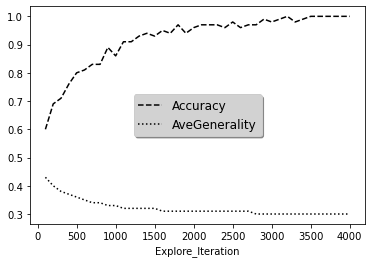

In [13]:
import numpy as np
import matplotlib.pyplot as plt

try:       
    datasetList = [] #np.array([])
    arraylist = np.array([])
    headerList = np.array([])
    ds = open(cons.outFileName+'_LearnTrack.txt','r')  
except Exception as inst:
    print(type(inst))
    print(inst.args)
    print(inst)
    print('cannot open', cons.outFileName+'_LearnTrack.txt')
    raise
else:
    headerList = ds.readline().rstrip('\n').split('\t')   #strip off first row
    for line in ds:
        lineList = line.strip('\n').split('\t')
        arraylist = [float(i) for i in lineList]
        datasetList.append(arraylist)
    ds.close()  


#maybe easier to reshape then use [:,0] but have not tried...
a = [row[0] for row in datasetList]   
b = [row[3] for row in datasetList]  
c = [row[4] for row in datasetList]  
    
# Create plots with pre-defined labels.
plt.plot(a, b, 'k--', label=headerList[3] )
plt.plot(a, c, 'k:', label=headerList[4])


plt.xlabel(headerList[0])
legend = plt.legend(loc='center', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#D2D2D2')

plt.show()